<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.



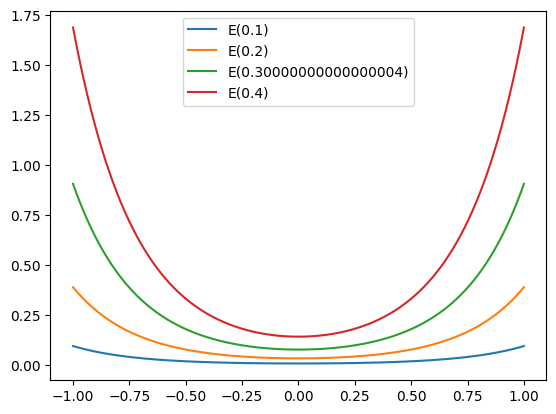

In [2]:

import numpy as np
from sympy import symbols, E, sin, lambdify
import matplotlib.pyplot as plt

x=symbols("x")

y=E**(x**2)*sin(x)

def diferenciaCentral(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

f=lambdify(x, y)
df = lambdify(x, y.diff(x))

X=np.linspace(-1, 1, 1000)

Y=[diferenciaCentral(f, X, i*0.1) for i in range(1, 5)]

for i in range(4):
    plt.plot(X, abs(df(X)-Y[i]), label=f"E({(i+1)*0.1})") #Graficándo el error de la aproximación numérica en función de h
plt.legend()


In [3]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv")

#plt.plot(df["Tiempo[ms]"], df["AnguloDeg"], "r-")

def DiferenciasCentralesLista(X, Y):
    Y=Y.to_numpy()
    X=X.to_numpy()
    dY=(Y[1::]-Y[:-1:])#/(X[1::]-X[:-1:])
    dX=(X[1::]+X[:-1:])/2
    return dX, dY

dX, dY= DiferenciasCentralesLista(df["Tiempo[ms]"], df["AnguloDeg"])
df
#plt.plot(dX, dY, "b-")


,Unnamed: 0,Tiempo[ms],AnguloDeg,AnguloRad
0,0,9,-30.710388,-0.535997
1,1,42,-30.017673,-0.523907
2,2,75,-28.762547,-0.502001
3,3,108,-26.507523,-0.462644
4,4,142,-24.611229,-0.429547
...,...,...,...,...
2842,2842,94709,4.937576,0.086177
2843,2843,94743,6.479851,0.113095
2844,2844,94776,7.940689,0.138591
2845,2845,94809,9.318092,0.162631


3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


El valor en z=0.1mm, calculado usando np.gradient() es: 3.5597495970637985. El error respecto al valor simbólico es 0.024215691131062034


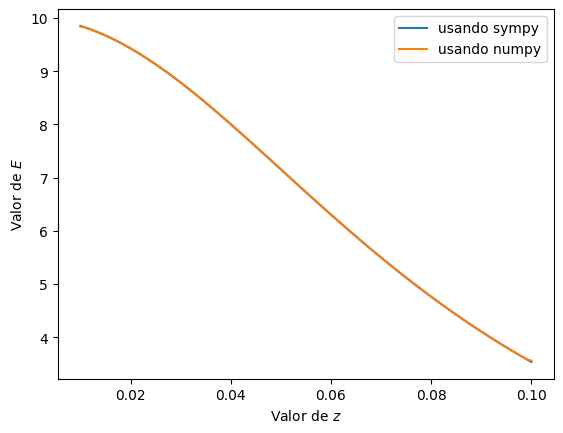

In [22]:
from sympy import symbols, sqrt
z = symbols("z")

V=(z)/(sqrt(z**2+0.1**2))
fV=lambdify(z, V)
dfV=lambdify(z, V.diff(z))
Z=np.linspace(0.01, 0.1, 100)
S=dfV(Z)
N=np.gradient(fV(Z), Z)

plt.plot(Z, S, label="usando sympy")
plt.plot(Z, N, label="usando numpy")


plt.ylabel("Valor de $E$")
plt.xlabel("Valor de $z$")


plt.legend()
print(f"El valor en z=0.1mm, calculado usando np.gradient() es: {N[-1]}. El error respecto al valor simbólico es {abs(N[-1]-dfV(0.1))}")